In [102]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import nn_perceptron as perceptron
import nn_2layers as mlp_2layers
import nn_generic as nn
import os, sys

path = os.path.join(os.path.dirname("nn"), '..', '')
sys.path.insert(1, path)
from NeuralNet import NeuralNet 

# 1. Dataset1

X shape:  (2, 100)
y shape:  (1, 100)


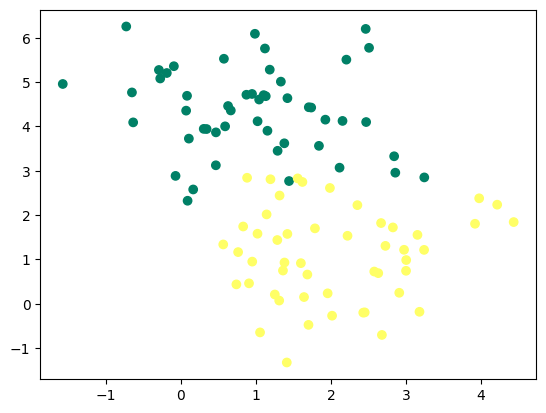

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
print("X shape: ", X.shape)
print("y shape: ", y.shape)

# plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.scatter(X[0, :], X[1, :], c=y, cmap="summer")
plt.show()

## 1-1. Train - 1 layer perceptron

100%|██████████| 10000/10000 [00:01<00:00, 8791.54it/s]


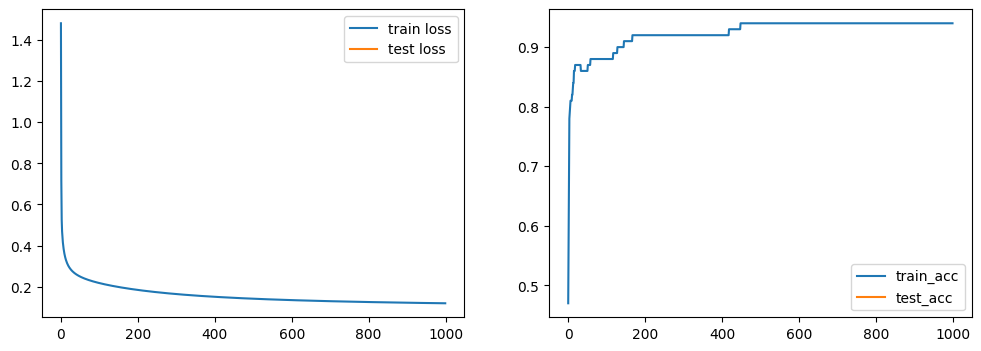

In [4]:
W, b, train_loss, train_acc = perceptron.nn(X.T, y.T, lr=0.03, epochs=10000, plot_graph=True)

## 1-2. Train - 2 layers multilayer perceptron

100%|██████████| 10000/10000 [00:01<00:00, 6605.40it/s]


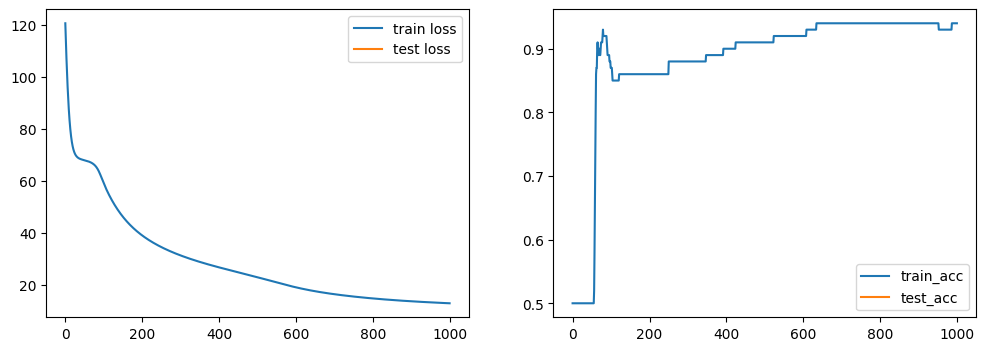

In [5]:
parameters, train_loss, train_acc = mlp_2layers.nn(X, y, n1=2, lr=0.03, epochs=10000, plot_graph=True)

## 1-3. Train - 4 layers multilayer perceptron

100%|██████████| 1000/1000 [00:00<00:00, 1545.89it/s]


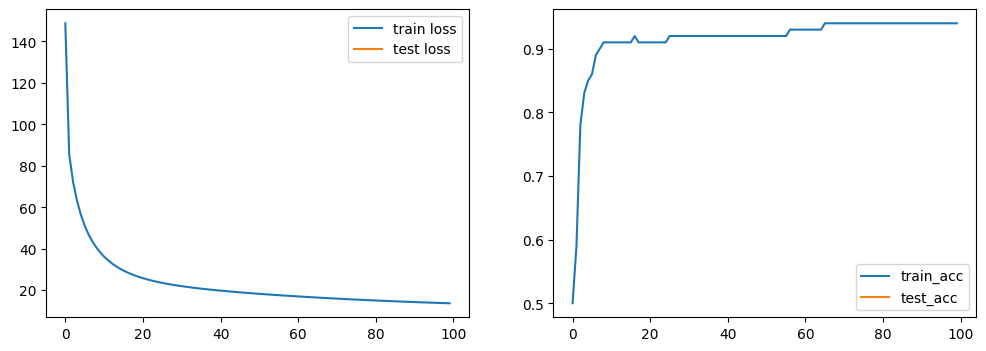

In [6]:
parameters, train_loss, train_acc = nn.nn(X, y, lr=0.03, epochs=1000, plot_graph=True)

## Test with a new data

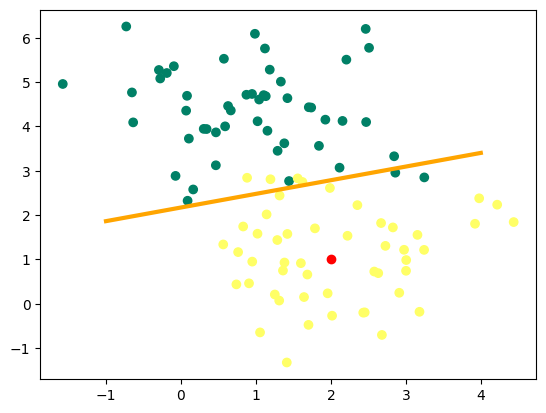

[0.98885962]
[1]


In [4]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c="r")
plt.plot(x0, x1, c="orange", lw=3)
plt.show()

print(perceptron.forward(new_plant, W, b))
print(perceptron.predict(new_plant, W, b))

# 2. Dataset2

X shape:  (2, 100)
y shape:  (1, 100)


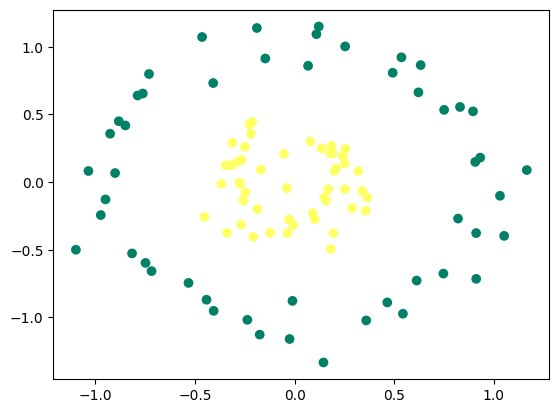

In [5]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print("X shape: ", X.shape)
print("y shape: ", y.shape)

plt.scatter(X[0, :], X[1 :], c=y, cmap="summer")
plt.show()

## 2-1. Train - 1 layer perceptron

In [3]:
W, b, train_loss, train_acc = perceptron.nn(X.T, y.T, lr=0.03, epochs=10000)

100%|██████████| 10000/10000 [00:00<00:00, 10778.00it/s]


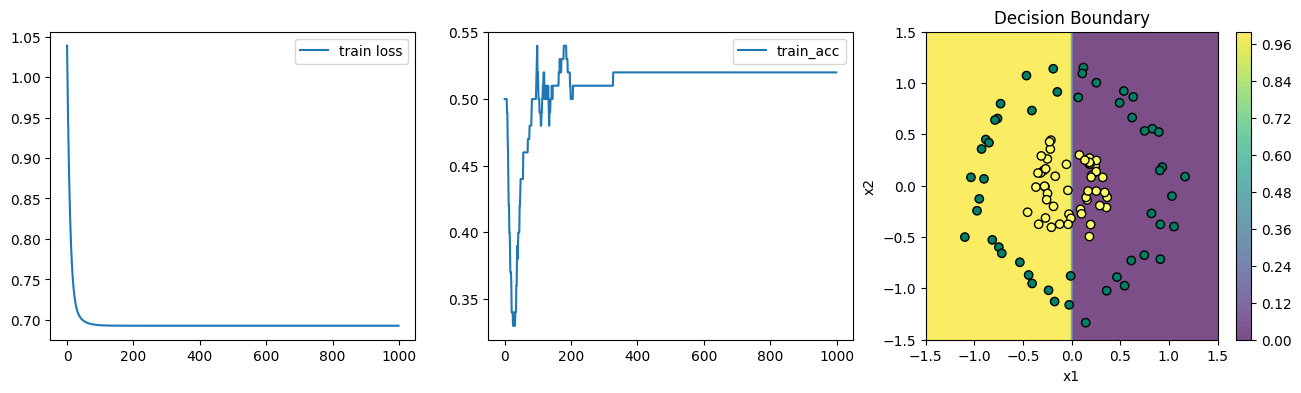

accuracy:  0.52


In [4]:
perceptron.plot_learning_curves(X.T, y.T, W.T, b, train_loss, train_acc)
print("accuracy: ", train_acc[-1])

## 2-2. Train - 2 layers multilayer perceptron

In [9]:
parameters, train_loss, train_acc = mlp_2layers.nn(X, y, n1=2, lr=0.03, epochs=10000)

100%|██████████| 10000/10000 [00:01<00:00, 6393.42it/s]


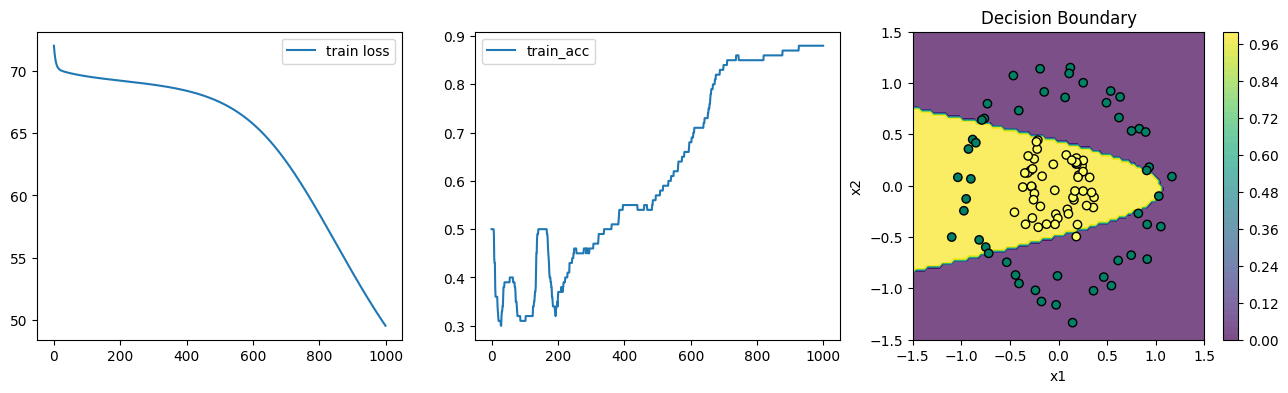

accuracy:  0.88


In [10]:
mlp_2layers.plot_learning_curves(X, y, parameters, train_loss, train_acc)
print("accuracy: ", train_acc[-1])

## 2-3. Train - 4 layers multilayer perceptron

In [7]:
parameters, train_loss, train_acc = nn.nn(X, y, lr=0.03, epochs=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1303.54it/s]


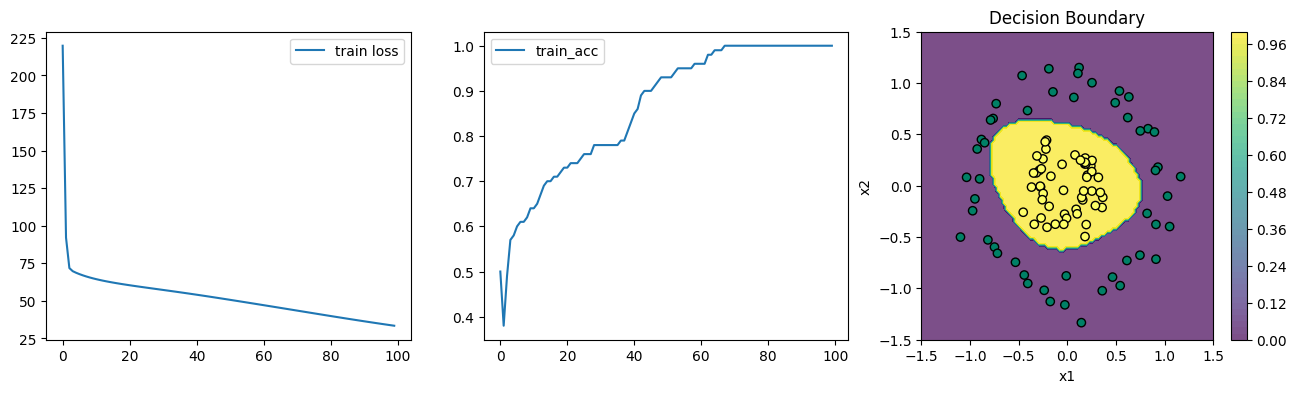

accuracy:  1.0


In [8]:
nn.plot_learning_curves(X, y, parameters, train_loss, train_acc)
print("accuracy: ", train_acc[-1])

In [9]:
import sys, os
path = os.path.join(os.path.dirname("nn"), '..', '')
sys.path.insert(1, path)

from srcs.activations import LeakyReLU, Sigmoid
from srcs.losses import BCELoss
from srcs.layers import Dense
import srcs.optimizers as optimizer

In [62]:
model = NeuralNet()
network = model.create_network([
    Dense(2, 20, activation='relu'),
    Dense(20, 10, activation='relu'),
    Dense(10, 5, activation='relu'),
    Dense(5, 1, activation='sigmoid')
    ])

In [63]:

model.compile(optimizer=optimizer.SGD(learning_rate=1e-2),
              loss=BCELoss(),
              metrics=['accuracy'])

for epoch in range(30):
    history = model.fit(X.T, y.T, batch_size=32)

 - loss: 0.6946 - accuracy: 0.5312 - loss: 0.6911 - accuracy: 0.5208 - loss: 0.6853 - accuracy: 0.6146 - loss: 0.6715 - accuracy: 0.8333 - loss: 0.6578 - accuracy: 0.7812 - loss: 0.6443 - accuracy: 0.8750 - loss: 0.6181 - accuracy: 0.9062 - loss: 0.5835 - accuracy: 1.0000 - loss: 0.5611 - accuracy: 0.8958 - loss: 0.5037 - accuracy: 0.9688 - loss: 0.4423 - accuracy: 0.9896 - loss: 0.3914 - accuracy: 0.9896 - loss: 0.3329 - accuracy: 0.9792 - loss: 0.2497 - accuracy: 1.0000 - loss: 0.1925 - accuracy: 1.0000 - loss: 0.1525 - accuracy: 1.0000 - loss: 0.1303 - accuracy: 1.0000 - loss: 0.0926 - accuracy: 1.0000 - loss: 0.0719 - accuracy: 1.0000 - loss: 0.0580 - accuracy: 1.0000 - loss: 0.0618 - accuracy: 1.0000 - loss: 0.0438 - accuracy: 1.0000 - loss: 0.0342 - accuracy: 1.0000 - loss: 0.0296 - accuracy: 1.0000 - loss: 0.0262 - accuracy: 1.0000 - loss: 0.0245 - accuracy: 1.0000 - loss: 0.0215 - accuracy: 1.0000 - loss: 0.0208 - accuracy: 1.0000 - loss: 0.0171 - accuracy: 1.0000 - loss: 0.015

In [35]:
loss = history.history['loss']
acc = history.history['accuracy']

print(loss[:10])
print(acc[:10])

[0.696414461401068, 0.6884525952666155, 0.6736732501319631, 0.6509239048284278, 0.6394977786082656]
[0.53125, 0.5104166666666666, 0.6875, 0.84375, 0.71875]


In [58]:
def plot_learning_curves(X, y, model, history):
    fig, ax = plt.subplots(1, 3, figsize=(16, 4))
    ax[0].plot(history.history['loss'], label="train loss")
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], label="train_acc")
    ax[1].legend()

    # Generate input data for decision boundary plot
    x1_range = np.linspace(-1.5, 1.5, 100)
    x2_range = np.linspace(-1.5, 1.5, 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Calculate output for each input pair
    z_grid = np.array([[model.predict(np.array([[x1, x2]]))[0, 0] for x1 in x1_range] for x2 in x2_range])

    # Plotting decision boundary
    contour = ax[2].contourf(x1_grid, x2_grid, z_grid, levels=50, cmap='viridis', alpha=0.7)

    # Plot the dataset points
    ax[2].scatter(X[0, :], X[1, :], c=y, cmap="summer", edgecolor='k')
    ax[2].set_title("Decision Boundary")
    ax[2].set_xlabel('x1')
    ax[2].set_ylabel('x2')

    plt.colorbar(contour, ax=ax[2])
    plt.show()

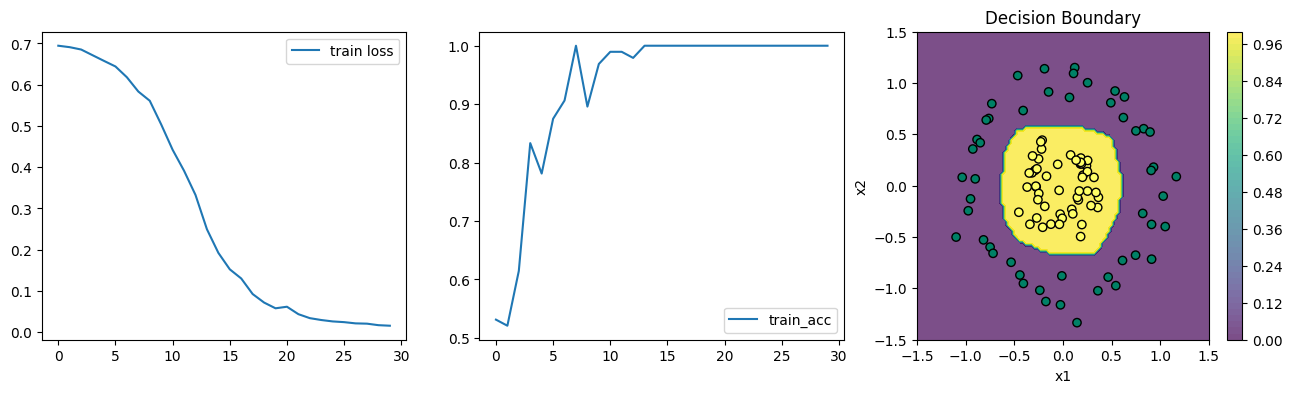

In [64]:
plot_learning_curves(X, y, model, history)

# 3. Dataset3

In [65]:
def load_data():
    train_dataset = h5py.File('../datasets/CAT_DOG/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('../datasets/CAT_DOG/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [66]:
x_train, y_train, x_test,y_test = load_data()

In [67]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [68]:
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


In [69]:
x_train = x_train.reshape(x_train.shape[0], -1) / x_train.max()
x_test = x_test.reshape(x_test.shape[0], -1) / x_test.max()

print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(1000, 4096)
(1000, 1)
(array([0., 1.]), array([500, 500]))
(200, 4096)
(200, 1)
(array([0., 1.]), array([100, 100]))


## 3-1. Train - 1 layer perceptron

100%|██████████| 5000/5000 [00:43<00:00, 115.34it/s]


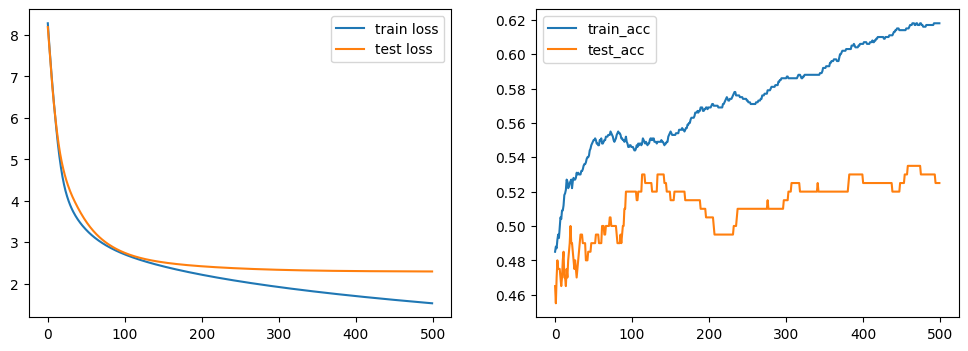

In [19]:
W, b, train_loss, train_acc = perceptron.nn(x_train, y_train, x_test, y_test, lr=0.01, epochs=5000, plot_graph=True)

## 3-2. Train - 2 layer multilayer perceptron

100%|██████████| 5000/5000 [02:17<00:00, 36.32it/s]


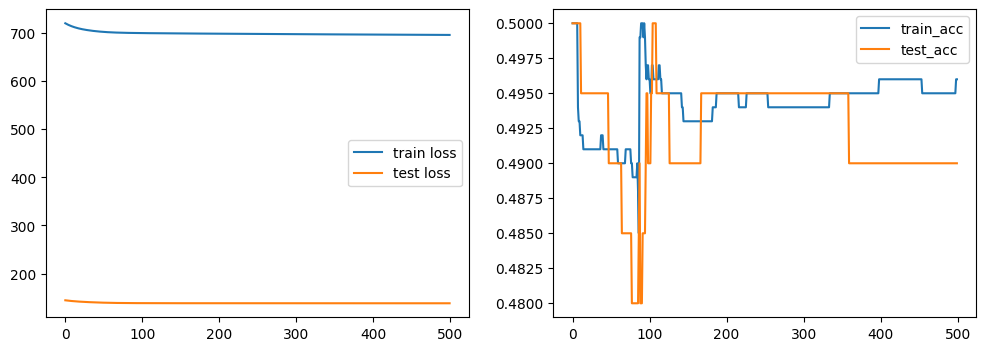

In [13]:
parameters, train_loss, train_acc = mlp_2layers.nn(x_train.T, y_train.T, n1=2, x_test=x_test.T, y_test=y_test.T, lr=0.01, epochs=5000, plot_graph=True)

In [ ]:
#mlp_2layers.plot_learning_curves(x_train.T, y_train.T, parameters, train_loss, train_acc)

## 3-3. Train - 4 layer multilayer perceptron

100%|██████████| 5000/5000 [04:24<00:00, 18.90it/s]


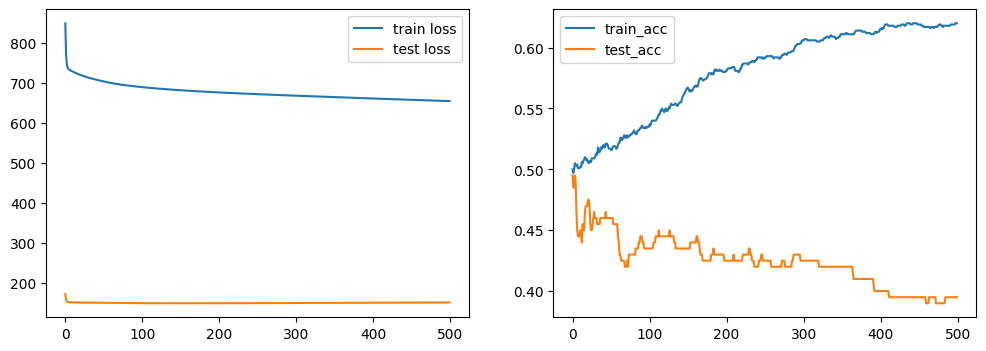

In [14]:
parameters, train_loss, train_acc = nn.nn(x_train.T, y_train.T, x_test=x_test.T, y_test=y_test.T, lr=0.01, epochs=5000, plot_graph=True)

In [80]:
model = NeuralNet()
network = model.create_network([
    Dense(4096, 3048, activation='relu'),
    Dense(3048, 2048, activation='relu'),
    Dense(2048, 1024, activation='relu'),
    Dense(1024, 512, activation='relu'),
    Dense(512, 64, activation='relu'),
    Dense(64, 1, activation='sigmoid')
    ])

In [82]:

model.compile(optimizer=optimizer.SGD(learning_rate=1e-3),
              loss=BCELoss(),
              metrics=['accuracy'])

for epoch in tqdm(range(20)):
    history = model.fit(x_train, y_train, batch_size=64)
    print()

  5%|▌         | 1/20 [00:08<02:41,  8.52s/it]

 - loss: 0.6707 - accuracy: 0.5885


 10%|█         | 2/20 [00:17<02:36,  8.68s/it]

 - loss: 0.6566 - accuracy: 0.6240


 15%|█▌        | 3/20 [00:26<02:31,  8.93s/it]

 - loss: 0.6439 - accuracy: 0.6135


 20%|██        | 4/20 [00:34<02:19,  8.73s/it]

 - loss: 0.6675 - accuracy: 0.6135


 25%|██▌       | 5/20 [00:43<02:11,  8.78s/it]

 - loss: 0.6287 - accuracy: 0.6542


 30%|███       | 6/20 [00:52<02:02,  8.75s/it]

 - loss: 0.6242 - accuracy: 0.6677


 35%|███▌      | 7/20 [01:01<01:54,  8.81s/it]

 - loss: 0.6369 - accuracy: 0.6458


 40%|████      | 8/20 [01:10<01:45,  8.76s/it]

 - loss: 0.6148 - accuracy: 0.6948


 45%|████▌     | 9/20 [01:18<01:35,  8.70s/it]

 - loss: 0.6114 - accuracy: 0.6896


 50%|█████     | 10/20 [01:27<01:27,  8.71s/it]

 - loss: 0.6028 - accuracy: 0.6760


 55%|█████▌    | 11/20 [01:36<01:18,  8.75s/it]

 - loss: 0.6574 - accuracy: 0.6625


 60%|██████    | 12/20 [01:44<01:09,  8.70s/it]

 - loss: 0.6171 - accuracy: 0.6823


 65%|██████▌   | 13/20 [01:53<01:01,  8.71s/it]

 - loss: 0.6118 - accuracy: 0.6562


 70%|███████   | 14/20 [02:02<00:53,  8.92s/it]

 - loss: 0.5739 - accuracy: 0.7052


 75%|███████▌  | 15/20 [02:11<00:44,  8.80s/it]

 - loss: 0.5855 - accuracy: 0.6750


 80%|████████  | 16/20 [02:19<00:34,  8.64s/it]

 - loss: 0.5772 - accuracy: 0.6990


 85%|████████▌ | 17/20 [02:28<00:26,  8.68s/it]

 - loss: 0.5722 - accuracy: 0.6885


 90%|█████████ | 18/20 [02:37<00:17,  8.64s/it]

 - loss: 0.5564 - accuracy: 0.7188


 95%|█████████▌| 19/20 [02:46<00:08,  8.73s/it]

 - loss: 0.5447 - accuracy: 0.7469


100%|██████████| 20/20 [02:55<00:00,  8.75s/it]

 - loss: 0.5486 - accuracy: 0.7271


In [84]:
for epoch in tqdm(range(20)):
    history = model.fit(x_train, y_train, batch_size=64)
    print()

  5%|▌         | 1/20 [00:09<02:52,  9.05s/it]

 - loss: 0.5712 - accuracy: 0.7156


 10%|█         | 2/20 [00:17<02:37,  8.77s/it]

 - loss: 0.5313 - accuracy: 0.7500


 15%|█▌        | 3/20 [00:26<02:32,  8.95s/it]

 - loss: 0.6052 - accuracy: 0.6896


 20%|██        | 4/20 [00:35<02:20,  8.77s/it]

 - loss: 0.5335 - accuracy: 0.7688


 25%|██▌       | 5/20 [00:43<02:10,  8.70s/it]

 - loss: 0.4954 - accuracy: 0.7562


 30%|███       | 6/20 [00:52<02:02,  8.72s/it]

 - loss: 0.5575 - accuracy: 0.7385


 35%|███▌      | 7/20 [01:00<01:50,  8.51s/it]

 - loss: 0.5040 - accuracy: 0.7552


 40%|████      | 8/20 [01:08<01:38,  8.24s/it]

 - loss: 0.5157 - accuracy: 0.7375


 45%|████▌     | 9/20 [01:18<01:38,  8.97s/it]

 - loss: 0.4898 - accuracy: 0.7573


 50%|█████     | 10/20 [01:29<01:35,  9.57s/it]

 - loss: 0.4905 - accuracy: 0.7688


 55%|█████▌    | 11/20 [01:39<01:26,  9.65s/it]

 - loss: 0.4654 - accuracy: 0.7750


 60%|██████    | 12/20 [01:49<01:18,  9.82s/it]

 - loss: 0.4718 - accuracy: 0.7948


 65%|██████▌   | 13/20 [01:59<01:07,  9.64s/it]

 - loss: 0.4555 - accuracy: 0.7948


 70%|███████   | 14/20 [02:09<00:58,  9.78s/it]

 - loss: 0.5443 - accuracy: 0.7302


 75%|███████▌  | 15/20 [02:21<00:52, 10.49s/it]

 - loss: 0.5048 - accuracy: 0.7500


 80%|████████  | 16/20 [02:32<00:42, 10.54s/it]

 - loss: 0.4696 - accuracy: 0.7792


 85%|████████▌ | 17/20 [02:43<00:32, 10.94s/it]

 - loss: 0.4417 - accuracy: 0.7854


 90%|█████████ | 18/20 [02:53<00:21, 10.58s/it]

 - loss: 0.5109 - accuracy: 0.7521


 95%|█████████▌| 19/20 [03:03<00:10, 10.49s/it]

 - loss: 0.4412 - accuracy: 0.8031


100%|██████████| 20/20 [03:13<00:00,  9.68s/it]

 - loss: 0.4836 - accuracy: 0.7646


In [86]:
for epoch in tqdm(range(20)):
    history = model.fit(x_train, y_train, batch_size=64)
    print()

  5%|▌         | 1/20 [00:08<02:39,  8.38s/it]

 - loss: 0.5284 - accuracy: 0.8000


 10%|█         | 2/20 [00:16<02:30,  8.37s/it]

 - loss: 0.5756 - accuracy: 0.7000


 15%|█▌        | 3/20 [00:25<02:25,  8.56s/it]

 - loss: 0.4142 - accuracy: 0.8260


 20%|██        | 4/20 [00:34<02:18,  8.67s/it]

 - loss: 0.4135 - accuracy: 0.8094


 25%|██▌       | 5/20 [00:42<02:09,  8.63s/it]

 - loss: 0.5676 - accuracy: 0.7292


 30%|███       | 6/20 [00:51<02:01,  8.67s/it]

 - loss: 0.4916 - accuracy: 0.7667


 35%|███▌      | 7/20 [01:01<01:59,  9.17s/it]

 - loss: 0.4939 - accuracy: 0.7771


 40%|████      | 8/20 [01:14<02:02, 10.18s/it]

 - loss: 0.4755 - accuracy: 0.7802


 45%|████▌     | 9/20 [01:26<01:59, 10.86s/it]

 - loss: 0.3800 - accuracy: 0.8552


 50%|█████     | 10/20 [01:36<01:46, 10.67s/it]

 - loss: 0.4650 - accuracy: 0.7812


 55%|█████▌    | 11/20 [01:45<01:31, 10.19s/it]

 - loss: 0.3716 - accuracy: 0.8406


 60%|██████    | 12/20 [01:57<01:25, 10.65s/it]

 - loss: 0.4352 - accuracy: 0.8281


 65%|██████▌   | 13/20 [02:09<01:16, 11.00s/it]

 - loss: 0.3636 - accuracy: 0.8260


 70%|███████   | 14/20 [02:21<01:07, 11.29s/it]

 - loss: 0.4128 - accuracy: 0.8313


 75%|███████▌  | 15/20 [02:31<00:53, 10.80s/it]

 - loss: 0.4093 - accuracy: 0.8187


 80%|████████  | 16/20 [02:42<00:44, 11.04s/it]

 - loss: 0.2950 - accuracy: 0.8781


 85%|████████▌ | 17/20 [02:54<00:33, 11.33s/it]

 - loss: 0.4265 - accuracy: 0.8000


 90%|█████████ | 18/20 [03:06<00:22, 11.42s/it]

 - loss: 0.4127 - accuracy: 0.8187


 95%|█████████▌| 19/20 [03:17<00:11, 11.43s/it]

 - loss: 0.3435 - accuracy: 0.8562


100%|██████████| 20/20 [03:26<00:00, 10.33s/it]

 - loss: 0.2720 - accuracy: 0.8948


In [94]:
for epoch in tqdm(range(10)):
    history = model.fit(x_train, y_train, batch_size=64)
    print()

 10%|█         | 1/10 [00:08<01:20,  8.98s/it]

 - loss: 0.6842 - accuracy: 0.6937


 20%|██        | 2/10 [00:17<01:09,  8.64s/it]

 - loss: 0.3086 - accuracy: 0.8781


 30%|███       | 3/10 [00:26<01:01,  8.72s/it]

 - loss: 0.2589 - accuracy: 0.8979


 40%|████      | 4/10 [00:36<00:55,  9.32s/it]

 - loss: 0.2519 - accuracy: 0.8833


 50%|█████     | 5/10 [00:49<00:53, 10.74s/it]

 - loss: 0.4507 - accuracy: 0.7969


 60%|██████    | 6/10 [01:02<00:45, 11.31s/it]

 - loss: 0.5383 - accuracy: 0.7469


 70%|███████   | 7/10 [01:12<00:32, 10.85s/it]

 - loss: 0.3455 - accuracy: 0.8542


 80%|████████  | 8/10 [01:21<00:20, 10.29s/it]

 - loss: 0.3619 - accuracy: 0.8396


 90%|█████████ | 9/10 [01:30<00:09,  9.92s/it]

 - loss: 0.2473 - accuracy: 0.9083


100%|██████████| 10/10 [01:40<00:00, 10.01s/it]

 - loss: 0.5550 - accuracy: 0.7385


In [95]:
for epoch in tqdm(range(10)):
    history = model.fit(x_train, y_train, batch_size=64)
    print()

 10%|█         | 1/10 [00:09<01:21,  9.08s/it]

 - loss: 0.2846 - accuracy: 0.8792


 20%|██        | 2/10 [00:20<01:21, 10.20s/it]

 - loss: 0.2394 - accuracy: 0.9083


 30%|███       | 3/10 [00:32<01:17, 11.14s/it]

 - loss: 0.3297 - accuracy: 0.8458


 40%|████      | 4/10 [00:42<01:03, 10.67s/it]

 - loss: 0.3045 - accuracy: 0.8729


 50%|█████     | 5/10 [00:51<00:50, 10.12s/it]

 - loss: 0.3738 - accuracy: 0.8354


 60%|██████    | 6/10 [01:00<00:39,  9.79s/it]

 - loss: 0.2225 - accuracy: 0.9219


 70%|███████   | 7/10 [01:09<00:28,  9.55s/it]

 - loss: 0.4945 - accuracy: 0.7688


 80%|████████  | 8/10 [01:18<00:18,  9.48s/it]

 - loss: 0.3402 - accuracy: 0.8552


 90%|█████████ | 9/10 [01:28<00:09,  9.50s/it]

 - loss: 0.2071 - accuracy: 0.9187


100%|██████████| 10/10 [01:39<00:00,  9.91s/it]

 - loss: 0.2660 - accuracy: 0.8938


In [97]:
for epoch in tqdm(range(10)):
    history = model.fit(x_train, y_train, batch_size=64)
    print()

 10%|█         | 1/10 [00:08<01:17,  8.63s/it]

 - loss: 0.4322 - accuracy: 0.8115


 20%|██        | 2/10 [00:17<01:11,  8.92s/it]

 - loss: 0.3105 - accuracy: 0.8792


 30%|███       | 3/10 [00:27<01:03,  9.09s/it]

 - loss: 0.2345 - accuracy: 0.9094


 40%|████      | 4/10 [00:36<00:54,  9.06s/it]

 - loss: 0.3181 - accuracy: 0.8573


 50%|█████     | 5/10 [00:45<00:45,  9.03s/it]

 - loss: 0.1702 - accuracy: 0.9354


 60%|██████    | 6/10 [00:54<00:36,  9.22s/it]

 - loss: 0.2027 - accuracy: 0.9260


 70%|███████   | 7/10 [01:03<00:27,  9.22s/it]

 - loss: 0.2071 - accuracy: 0.9125


 80%|████████  | 8/10 [01:13<00:18,  9.21s/it]

 - loss: 0.2354 - accuracy: 0.9250


 90%|█████████ | 9/10 [01:21<00:09,  9.09s/it]

 - loss: 0.3077 - accuracy: 0.8615


100%|██████████| 10/10 [01:31<00:00,  9.12s/it]

 - loss: 0.1569 - accuracy: 0.9531


In [99]:
for epoch in tqdm(range(10)):
    history = model.fit(x_train, y_train, batch_size=64)
    print()

 10%|█         | 1/10 [00:09<01:24,  9.36s/it]

 - loss: 0.6064 - accuracy: 0.6917


 20%|██        | 2/10 [00:18<01:11,  9.00s/it]

 - loss: 0.3132 - accuracy: 0.8635


 30%|███       | 3/10 [00:27<01:05,  9.33s/it]

 - loss: 0.2316 - accuracy: 0.9104


 40%|████      | 4/10 [00:36<00:55,  9.26s/it]

 - loss: 0.1569 - accuracy: 0.9552


 50%|█████     | 5/10 [00:45<00:45,  9.02s/it]

 - loss: 0.4553 - accuracy: 0.8094


 60%|██████    | 6/10 [00:54<00:35,  8.86s/it]

 - loss: 0.3960 - accuracy: 0.8302


 70%|███████   | 7/10 [01:02<00:26,  8.84s/it]

 - loss: 0.1796 - accuracy: 0.9333


 80%|████████  | 8/10 [01:13<00:18,  9.50s/it]

 - loss: 0.3499 - accuracy: 0.8677


 90%|█████████ | 9/10 [01:22<00:09,  9.28s/it]

 - loss: 0.2536 - accuracy: 0.9083


100%|██████████| 10/10 [01:31<00:00,  9.17s/it]

 - loss: 0.1146 - accuracy: 0.9531


In [100]:
model.name = "binary_dog_cat"

In [101]:
model.save_topology("../topologies/binary_dog_cat")
model.save_parameters("../parameters/binary_dog_cat")
filepath = "../histories/binary_dot_cat"
np.savez(filepath, *history.history)
print(f"> Saving model history to '{filepath}.npz'")

> Saving model configuration to '../topologies/binary_dog_cat.json'
> Saving model parameters to '../parameters/binary_dog_cat.npz'
> Saving model history to '../histories/binary_dot_cat.npz'


In [103]:
from ModelPlotter import ModelPlotter

In [116]:
print(history, type(history))

binary_dog_cat(
	Dense((4096, 3048), activation=ReLU)
	Dense((3048, 2048), activation=ReLU)
	Dense((2048, 1024), activation=ReLU)
	Dense((1024, 512), activation=ReLU)
	Dense((512, 64), activation=ReLU)
	Dense((64, 1), activation=Sigmoid)
) <class 'NeuralNet.NeuralNet'>


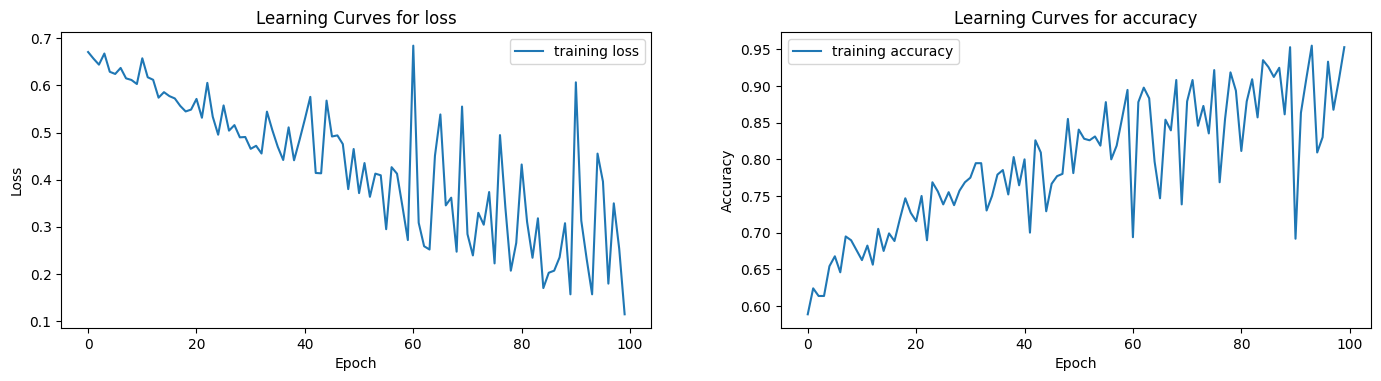

In [109]:
plotter = ModelPlotter()
plotter.set_model_histories([history])
plotter.set_model_names(["binary_dog_cat"])
plotter.plot()